In [1]:
import pandas as pd
import numpy as np

In [2]:
combined_df=pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\MAJOR_PROJECT\\NEW_FILES\\NONVPN.csv")

In [3]:
row_count, column_count = combined_df.shape
print("Row count:", row_count)
print("Column count:", column_count)

Row count: 199905
Column count: 74


In [4]:
label_distribution = combined_df['Label'].value_counts()
print("\nLabel Distribution:")
print(label_distribution)


Label Distribution:
VOIP             122579
EMAIL             56159
CHAT              17755
FILE TRANSFER      2738
STREAMING           674
Name: Label, dtype: int64


In [5]:
# List all column names
column_names = combined_df.columns.tolist()
print("Column names:", column_names)

Column names: ['frame.len', 'ip.proto', 'tcp.srcport', 'tcp.dstport', 'udp.srcport', 'udp.dstport', 'tcp.seq', 'frame.time_epoch', 'tcp.stream', 'ip.flags.df', 'frame.encap_type', 'frame.cap_len', 'frame.marked', 'eth.lg', 'eth.ig', 'ip.dsfield.dscp', 'ip.flags.rb', 'ip.flags.mf', 'frame.time_relative', 'ip.len', 'tcp.len', 'udp.length', 'frame.time_delta', 'ip.hdr_len', 'tcp.hdr_len', 'tcp.analysis.bytes_in_flight', 'tcp.time_relative', 'tcp.time_delta', 'tcp.analysis.ack_rtt', 'tcp.flags.syn', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.fin', 'tcp.flags.urg', 'ip.frag_offset', 'ip.ttl', 'tcp.ack', 'tcp.window_size', 'tcp.flags.cwr', 'tcp.window_size_value', 'tcp.urgent_pointer', 'tcp.options.nop', 'tcp.analysis.bytes_in_flight.1', 'tcp.analysis.push_bytes_sent', 'icmp.type', 'icmp.code', 'icmp.ident', 'icmp.seq', 'http.content_length', 'data.len', 'dns.flags.response', 'dns.flags.opcode', 'dns.count.queries', 'dns.count.answers', 'dns.resp.ttl', 'dns.resp.len', '

In [6]:
# Number of entries in each column
entries_per_column = combined_df.count()
print("\nNumber of entries in each column:")
print(entries_per_column)


Number of entries in each column:
frame.len                         199905
ip.proto                          163516
tcp.srcport                           61
tcp.dstport                           61
udp.srcport                       169386
                                   ...  
tcp.analysis.zero_window               0
tcp.analysis.zero_window_probe         0
frame.cap_len.1                   199905
Label                             199905
Class                             199905
Length: 74, dtype: int64


In [7]:
# Missing values in each column
missing_values_per_column = combined_df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values_per_column)



Missing values in each column:
frame.len                              0
ip.proto                           36389
tcp.srcport                       199844
tcp.dstport                       199844
udp.srcport                        30519
                                   ...  
tcp.analysis.zero_window          199905
tcp.analysis.zero_window_probe    199905
frame.cap_len.1                        0
Label                                  0
Class                                  0
Length: 74, dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D,Dropout
#from keras.preprocessing.text import Tokenizer
#from keras.utils.np_utils import to_categorical

In [9]:
# Assuming combined_df is your DataFrame containing the data
voip_packets = combined_df[combined_df['Label'] == 'VOIP'].head(2500)
email_packets = combined_df[combined_df['Label'] == 'EMAIL'].head(2500)
chat_packets = combined_df[combined_df['Label'] == 'CHAT'].head(2500)

remaining_packets = combined_df[(combined_df['Label'] != 'VOIP') & (combined_df['Label'] != 'EMAIL') & (combined_df['Label'] != 'CHAT') ]

# Concatenate the first 2000 VOIP packets, 2000 P2P packets, and the remaining packets
final_dataset = pd.concat([voip_packets, email_packets,chat_packets, remaining_packets], ignore_index=True)
print(final_dataset.shape)

(10912, 74)


In [10]:
# List all column names
column_names = combined_df.columns.tolist()
print("Column names:", column_names)

Column names: ['frame.len', 'ip.proto', 'tcp.srcport', 'tcp.dstport', 'udp.srcport', 'udp.dstport', 'tcp.seq', 'frame.time_epoch', 'tcp.stream', 'ip.flags.df', 'frame.encap_type', 'frame.cap_len', 'frame.marked', 'eth.lg', 'eth.ig', 'ip.dsfield.dscp', 'ip.flags.rb', 'ip.flags.mf', 'frame.time_relative', 'ip.len', 'tcp.len', 'udp.length', 'frame.time_delta', 'ip.hdr_len', 'tcp.hdr_len', 'tcp.analysis.bytes_in_flight', 'tcp.time_relative', 'tcp.time_delta', 'tcp.analysis.ack_rtt', 'tcp.flags.syn', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.fin', 'tcp.flags.urg', 'ip.frag_offset', 'ip.ttl', 'tcp.ack', 'tcp.window_size', 'tcp.flags.cwr', 'tcp.window_size_value', 'tcp.urgent_pointer', 'tcp.options.nop', 'tcp.analysis.bytes_in_flight.1', 'tcp.analysis.push_bytes_sent', 'icmp.type', 'icmp.code', 'icmp.ident', 'icmp.seq', 'http.content_length', 'data.len', 'dns.flags.response', 'dns.flags.opcode', 'dns.count.queries', 'dns.count.answers', 'dns.resp.ttl', 'dns.resp.len', '

In [11]:
# Define a list of unwanted column names
#unwanted_columns = ['frame.len', 'tcp.seq','tcp.flags.syn','tcp.flags.ack','tcp.flags.push', 'tcp.flags.reset',\
                   #'data.len','udp.length.bad','udp.length.bad_zero']  # Add all unwanted column names here

    
unwanted_columns = ['frame.len','tcp.flags.syn','tcp.flags.ack','tcp.flags.push', 'tcp.flags.reset','data.len']  # Add all unwanted column names here
# Remove unwanted columns from the DataFrame
filtered_df = final_dataset.drop(columns=unwanted_columns)

# Display the filtered DataFrame
print(filtered_df)


       ip.proto  tcp.srcport  tcp.dstport  udp.srcport  udp.dstport  tcp.seq  \
0          17.0          NaN          NaN      19305.0      33306.0      NaN   
1          17.0          NaN          NaN      19305.0      33306.0      NaN   
2          17.0          NaN          NaN      19305.0      33306.0      NaN   
3          17.0          NaN          NaN      19305.0      33306.0      NaN   
4          17.0          NaN          NaN      19305.0      33306.0      NaN   
...         ...          ...          ...          ...          ...      ...   
10907      17.0          NaN          NaN        137.0        137.0      NaN   
10908      17.0          NaN          NaN      61009.0      45087.0      NaN   
10909      17.0          NaN          NaN      45087.0      61009.0      NaN   
10910      17.0          NaN          NaN      35468.0      61009.0      NaN   
10911      17.0          NaN          NaN      61009.0      35468.0      NaN   

       frame.time_epoch  tcp.stream  ip

In [12]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Label' column
filtered_df['Label'] = label_encoder.fit_transform(filtered_df['Label'])

 # Display the encoded labels
print("Encoded Labels:")
print(filtered_df['Label'].value_counts())


Encoded Labels:
2    2738
4    2500
1    2500
0    2500
3     674
Name: Label, dtype: int64


In [13]:
# Mapping original labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'CHAT': 0, 'EMAIL': 1, 'FILE TRANSFER': 2, 'STREAMING': 3, 'VOIP': 4}


In [14]:
X = filtered_df.drop(columns=['Label','Class'])
y = filtered_df['Label']


In [15]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
num_classes = len(encoder.classes_)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(8729, 66)
(8729,)


In [17]:
from sklearn.impute import SimpleImputer

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test= imputer.transform(X_test)

In [18]:
x_training_data = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
print(x_training_data.shape)


(8729, 50, 1)


# CNN-RNN

In [39]:
#import time
#import psutil
#import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define input shape based on your data
input_shape = (x_training_data.shape[1], 1)  # Shape of your input data assuming it's sequential

# Define the number of classes for the output
num_classes = 5  # Assuming you have 5 classes for the output


# get the start time
#start_wall_time = time.time()
#start_cpu_time = time.process_time()


# Create the combined RNN-CNN model
model = Sequential([
    # CNN layers
    Conv1D(32, 3, activation='relu', input_shape=input_shape),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    #Flatten(),

    # RNN layers
    SimpleRNN(units=64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=64),
    Dropout(0.2),

    # Output layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Print the model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Train the model
history = model.fit(X_train, y_train, epochs=75, batch_size=24, validation_data=(X_test, y_test),callbacks=[early_stopping])

# get the end time
#end_wall_time = time.time()
#end_cpu_time = time.process_time()


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 48, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 22, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 11, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,173 (90.52 KB)

 Trainable params: 23,173 (90.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75
364/364 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3615 - loss: 1.4328 - val_accuracy: 0.6876 - val_loss: 0.7243
Epoch 2/75
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6778 - loss: 0.7875 - val_accuracy: 0.8158 - val_loss: 0.5677
Epoch 3/75
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7760 - loss: 0.6624 - val_accuracy: 0.8433 - val_loss: 0.5189
Epoch 4/75
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7986 - loss: 0.5951 - val_accuracy: 0.8213 - val_loss: 0.5283
Epoch 5/75
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8244 - loss: 0.5492 - val_accuracy: 0.8378 - val_loss: 0.4752
Epoch 6/75
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8169 - loss: 0.5337 - val_accuracy: 0.8562 - val_loss: 0.4345
Epoch 7/75
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8379 - loss: 0.4905 - val_accuracy: 0.8369 - val_loss: 0.4619
Epoch 8/75
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8286 - loss: 0.5073 - val_accuracy: 0.

In [55]:
# Evaluate the RNN-CNN model(with early stop)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.34709876775741577
Test accuracy: 0.8937242031097412


In [115]:
#Performance Metrics for RNN and CNN combined
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Compute predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


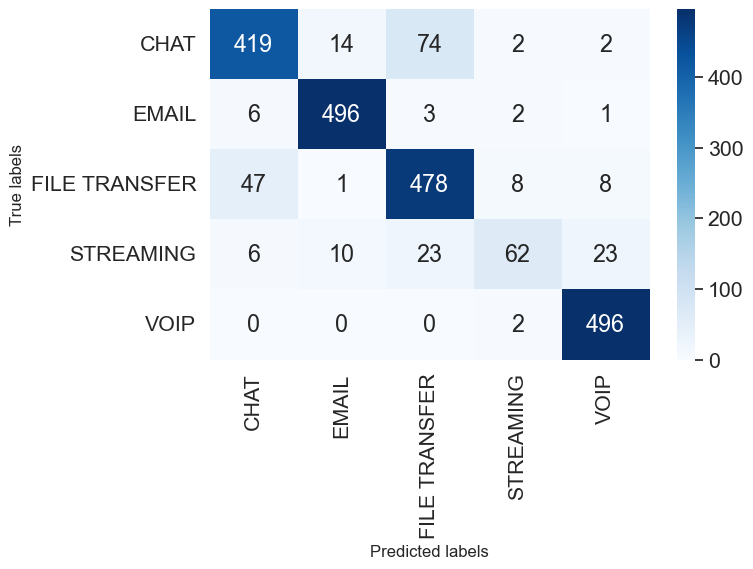

In [116]:
# Define the labels for your classes
labels =['CHAT', 'EMAIL', 'FILE TRANSFER', 'STREAMING', 'VOIP']

# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Increase the size of the plot
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted labels', fontsize=12)  # Increase fontsize and adjust label position
plt.ylabel('True labels', fontsize=12)  # Increase fontsize and adjust label position
#plt.title('Confusion Matrix')

# Adjust layout to ensure all labels are fully visible
plt.tight_layout()

# Save the plot as an image file
plt.savefig('cm_NON-VPN-COMBINED.png')

# Show the plot
plt.show()

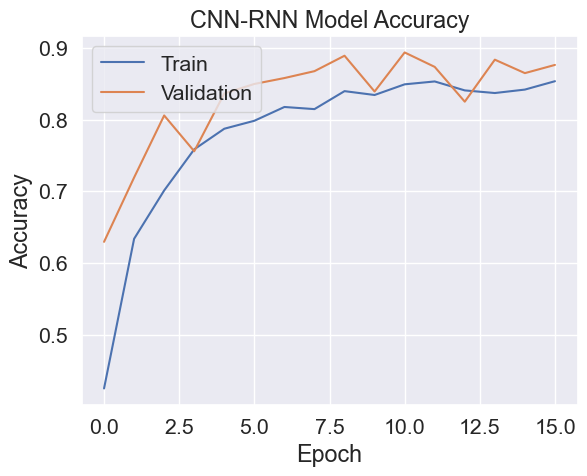

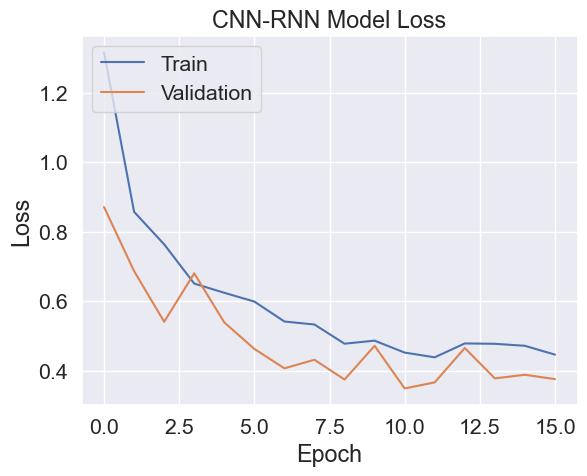


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       511
           1       0.95      0.98      0.96       508
           2       0.83      0.88      0.85       542
           3       0.82      0.50      0.62       124
           4       0.94      1.00      0.96       498

    accuracy                           0.89      2183
   macro avg       0.88      0.83      0.85      2183
weighted avg       0.89      0.89      0.89      2183



In [117]:
#Performance Metrics for RNN and CNN combined
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN-RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN-RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))



In [118]:
from sklearn.preprocessing import OneHotEncoder

# Concatenate y_train and y_test to get all unique categories
unique_categories = np.unique(np.concatenate((y_train, y_test)))

# Initialize the OneHotEncoder with unique categories
encoder = OneHotEncoder(categories=[unique_categories], sparse=False)

# Fit-transform on y_train and transform on y_test
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))
#y_pred_one_hot = encoder.transform(y_pred.reshape(-1, 1))



C:\ProgramData\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


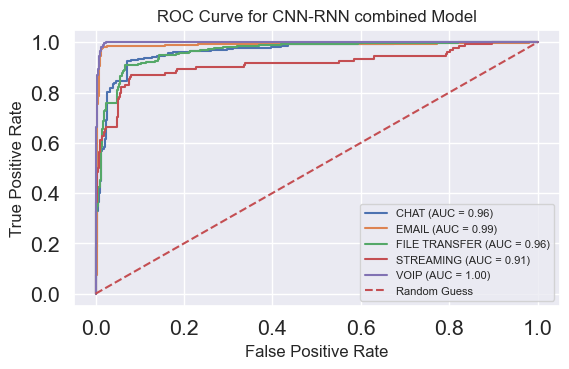


Average ROC AUC score across all classes: 0.9655
Overall ROC AUC Score (OvR): 0.97
Overall ROC AUC Score (OvO): 0.97


In [119]:
# Calculate ROC curve and AUC score for each class
roc_auc_scores = []

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming y_test_one_hot and y_pred_proba_one_hot are the one-hot encoded ground truth labels and predicted probabilities, respectively

# Calculate the number of classes
num_classes = y_test_one_hot.shape[1]

label_names = ['CHAT', 'EMAIL', 'FILE TRANSFER', 'STREAMING', 'VOIP']

# Create a new figure for all classes with adjusted plot size
plt.figure(figsize=(6, 4))

# Plot ROC curve for each class
for i in range(num_classes):
    # Compute ROC curve and AUC for class i
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label=f'{label_names[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('ROC Curve for CNN-RNN combined Model',fontsize=12)

# Add legend with reduced font size
plt.legend(prop={'size': 8})

plt.tight_layout()

# Save the plot as an image file
plt.savefig('roc_curve_NON-VPN-combined.png')

# Show the plot
plt.show()


# Calculate average ROC AUC score across all classes
average_roc_auc = np.mean(roc_auc_scores)
print(f"\nAverage ROC AUC score across all classes: {average_roc_auc:.4f}")

# Calculate overall ROC AUC score using one-vs-rest (ovr) strategy
overall_roc_auc_ovr = roc_auc_score(y_test_one_hot, y_pred, multi_class='ovr', average='macro')

# Calculate overall ROC AUC score using one-vs-one (ovo) strategy
overall_roc_auc_ovo = roc_auc_score(y_test_one_hot, y_pred, multi_class='ovo', average='macro')

print(f'Overall ROC AUC Score (OvR): {overall_roc_auc_ovr:.2f}')
print(f'Overall ROC AUC Score (OvO): {overall_roc_auc_ovo:.2f}')

# RNN

In [19]:
import time
import psutil
import os

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define input shape based on your data
input_shape = (x_training_data.shape[1], 1)  # Shape of your input data

# Define the number of classes for the output
num_classes = 5  # Assuming you have 6 classes for the output


# get the start time
start_wall_time = time.time()
start_cpu_time = time.process_time()

# Create the RNN model
rnn_model = Sequential([
    SimpleRNN(units=64, return_sequences=True, input_shape=input_shape),
    Dropout(0.2),
    SimpleRNN(units=64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=64),
    Dropout(0.2),
    Dense(units=num_classes, activation='softmax')
])


# Compile the model
rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Print the model summary
rnn_model.summary()



# Train the model with early stopping
history = rnn_model.fit(X_train, y_train, epochs=75, batch_size=32,
                        validation_data=(X_test, y_test),callbacks=[early_stopping])

# get the end time
end_wall_time = time.time()
end_cpu_time = time.process_time()


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,061 (82.27 KB)

 Trainable params: 21,061 (82.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75
273/273 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.5211 - loss: 1.1618 - val_accuracy: 0.8218 - val_loss: 0.5672
Epoch 2/75
273/273 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.8025 - loss: 0.6329 - val_accuracy: 0.8378 - val_loss: 0.4940
Epoch 3/75
273/273 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - accuracy: 0.8232 - loss: 0.5215 - val_accuracy: 0.8497 - val_loss: 0.4717
Epoch 4/75
273/273 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.8342 - loss: 0.4724 - val_accuracy: 0.8461 - val_loss: 0.4395
Epoch 5/75
273/273 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - accuracy: 0.8472 - loss: 0.4590 - val_accuracy: 0.8571 - val_loss: 0.4088
Epoch 6/75
273/273 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - accuracy: 0.8567 - loss: 0.4365 - val_accuracy: 0.8694 - val_loss: 0.3932
Epoch 7/75
273/273 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.8632 - loss: 0.4190 - val_accuracy: 0.8639 - val_loss: 0.3944
Epoch 8/75
273/273 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.8613 - loss: 0.4175 - 

In [48]:
# Evaluate the RNN model(with early stop and batch size=32)
score = rnn_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.274238646030426
Test accuracy: 0.9120476245880127


In [120]:
# Compute predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       511
           1       0.88      0.85      0.86       508
           2       0.89      0.91      0.90       542
           3       0.90      0.69      0.78       124
           4       0.98      0.98      0.98       498

    accuracy                           0.91      2183
   macro avg       0.91      0.88      0.89      2183
weighted avg       0.91      0.91      0.91      2183



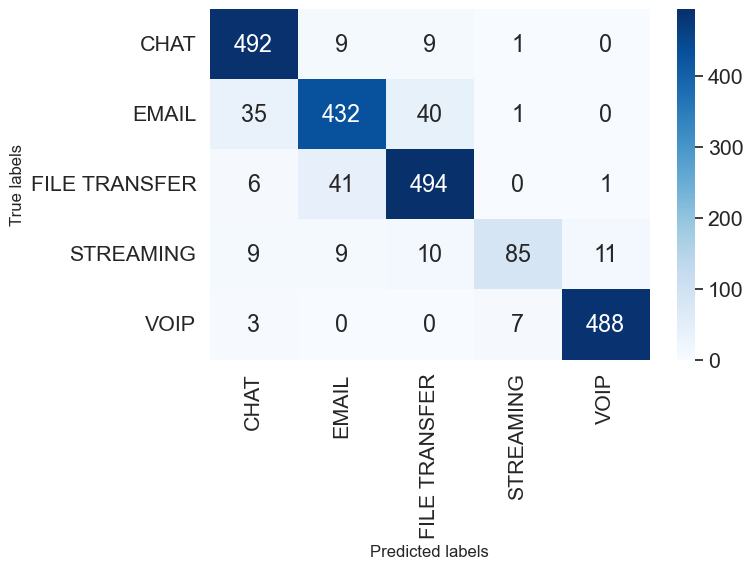

In [121]:
# Define the labels for your classes
labels =['CHAT', 'EMAIL', 'FILE TRANSFER', 'STREAMING', 'VOIP']

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Increase the size of the plot
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted labels', fontsize=12)  # Increase fontsize and adjust label position
plt.ylabel('True labels', fontsize=12)  # Increase fontsize and adjust label position
#plt.title('Confusion Matrix')

# Adjust layout to ensure all labels are fully visible
plt.tight_layout()

# Save the plot as an image file
plt.savefig('cm_NON-VPN-RNN.png')

# Show the plot
plt.show()

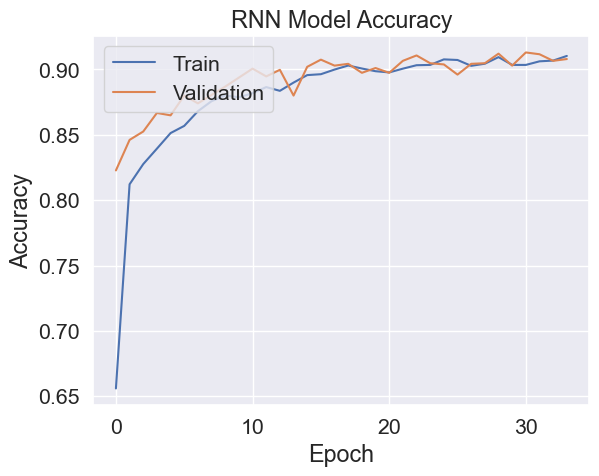

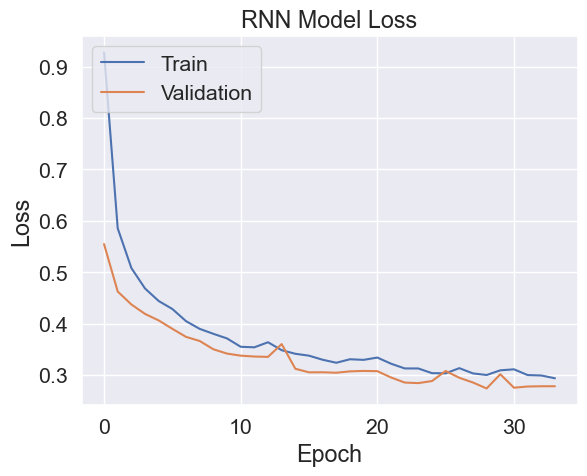

In [51]:
#Performance Metrics for RNN 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




In [29]:
# get the execution time
wall_time = end_wall_time - start_wall_time
cpu_time = end_cpu_time - start_cpu_time

print(f'Elapsed time: {round((wall_time),2)} seconds')
print(f'CPU time: {round((cpu_time),2)} seconds')

print(f'Physical Memory usage: {int(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)} MB') 
print(f'Virtual Memory usage:  {int(psutil.Process(os.getpid()).memory_info().vms / 1024 ** 2)} MB')

Elapsed time: 1051.89 seconds
CPU time: 1018.19 seconds
Physical Memory usage: 744 MB
Virtual Memory usage:  750 MB


In [122]:
from sklearn.preprocessing import OneHotEncoder

# Concatenate y_train and y_test to get all unique categories
unique_categories = np.unique(np.concatenate((y_train, y_test)))

# Initialize the OneHotEncoder with unique categories
encoder = OneHotEncoder(categories=[unique_categories], sparse=False)

# Fit-transform on y_train and transform on y_test
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))
#y_pred_one_hot = encoder.transform(y_pred.reshape(-1, 1))
# Proceed with calculating ROC and AUC as before


C:\ProgramData\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


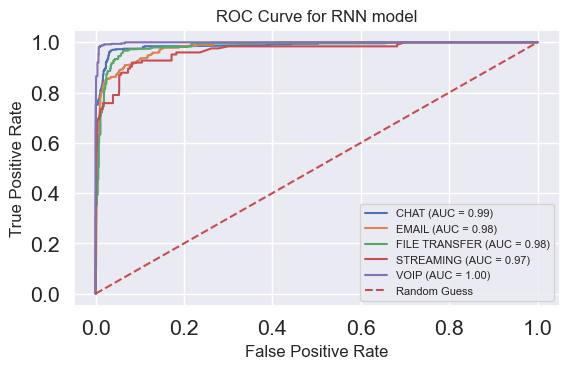


Average ROC AUC score across all classes: 0.9829
Overall ROC AUC Score (OvR): 0.98
Overall ROC AUC Score (OvO): 0.98


In [123]:
# Calculate ROC curve and AUC score for each class
roc_auc_scores = []

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming y_test_one_hot and y_pred_proba_one_hot are the one-hot encoded ground truth labels and predicted probabilities, respectively

# Calculate the number of classes
num_classes = y_test_one_hot.shape[1]

label_names = ['CHAT', 'EMAIL', 'FILE TRANSFER', 'STREAMING', 'VOIP']

# Create a new figure for all classes with adjusted plot size
plt.figure(figsize=(6, 4))

# Plot ROC curve for each class
for i in range(num_classes):
    # Compute ROC curve and AUC for class i
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label=f'{label_names[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('ROC Curve for RNN model',fontsize=12)
plt.legend(prop={'size': 8})
plt.tight_layout()

# Save the plot as an image file
plt.savefig('roc_curve_NON-VPN-combined.png')
# Show the plot
plt.show()


# Calculate average ROC AUC score across all classes
average_roc_auc = np.mean(roc_auc_scores)
print(f"\nAverage ROC AUC score across all classes: {average_roc_auc:.4f}")

# Calculate overall ROC AUC score using one-vs-rest (ovr) strategy
overall_roc_auc_ovr = roc_auc_score(y_test_one_hot, y_pred, multi_class='ovr', average='macro')

# Calculate overall ROC AUC score using one-vs-one (ovo) strategy
overall_roc_auc_ovo = roc_auc_score(y_test_one_hot, y_pred, multi_class='ovo', average='macro')

print(f'Overall ROC AUC Score (OvR): {overall_roc_auc_ovr:.2f}')
print(f'Overall ROC AUC Score (OvO): {overall_roc_auc_ovo:.2f}')

# Radial Basis Function

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import time
import psutil
import os

In [33]:
# get the start time
#start_wall_time = time.time()
#start_cpu_time = time.process_time()


# Define an RBF network pipeline
rbf_network = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=10),  # Adjust the number of clusters as needed
    SVC(kernel='rbf')
)

# Train the RBF network
rbf_network.fit(X_train, y_train)


# Make predictions on the testing data
y_pred = rbf_network.predict(X_test)

# get the end time
#end_wall_time = time.time()
#end_cpu_time = time.process_time()

C:\ProgramData\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7512597343105818
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       511
           1       0.78      0.96      0.86       508
           2       0.73      0.70      0.71       542
           3       0.59      0.29      0.39       124
           4       0.75      0.85      0.79       498

    accuracy                           0.75      2183
   macro avg       0.72      0.68      0.69      2183
weighted avg       0.75      0.75      0.74      2183



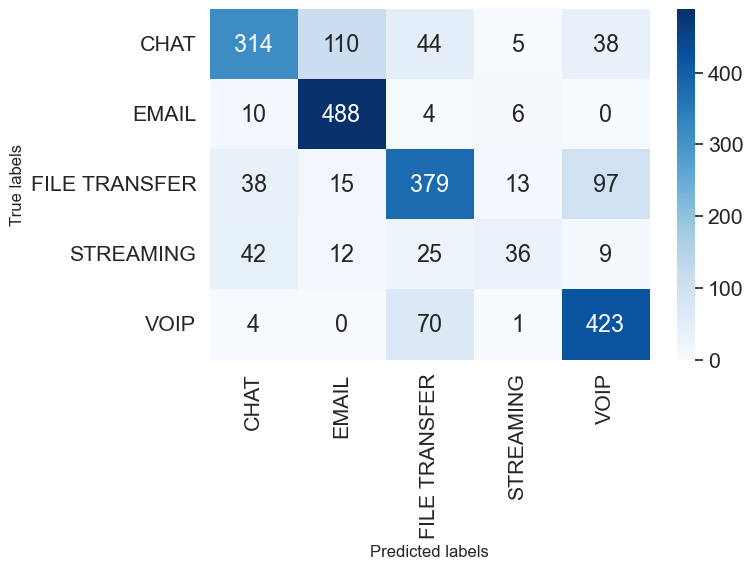

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the labels for your classes
labels =['CHAT', 'EMAIL', 'FILE TRANSFER', 'STREAMING', 'VOIP']


conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Increase the size of the plot
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted labels', fontsize=12)  # Increase fontsize and adjust label position
plt.ylabel('True labels', fontsize=12)  # Increase fontsize and adjust label position
#plt.title('Confusion Matrix')

# Adjust layout to ensure all labels are fully visible
plt.tight_layout()

# Save the plot as an image file
plt.savefig('cm_non-vpn-RBF.png')

# Show the plot
plt.show()

In [36]:
from sklearn.preprocessing import OneHotEncoder

# Concatenate y_train and y_test to get all unique categories
unique_categories = np.unique(np.concatenate((y_train, y_test)))

# Initialize the OneHotEncoder with unique categories
encoder = OneHotEncoder(categories=[unique_categories], sparse=False)

# Fit-transform on y_train and transform on y_test
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))
y_pred_one_hot = encoder.transform(y_pred.reshape(-1, 1))
# Proceed with calculating ROC and AUC as before


C:\ProgramData\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


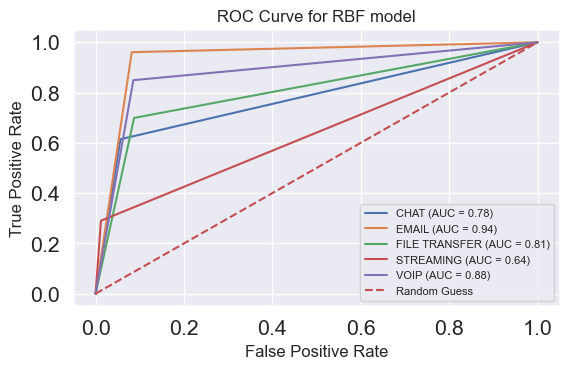


Average ROC AUC score across all classes: 0.8091
Overall ROC AUC Score (OvR): 0.81
Overall ROC AUC Score (OvO): 0.81


In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Calculate ROC curve and AUC score for each class
roc_auc_scores = []


# Calculate the number of classes
num_classes = y_test_one_hot.shape[1]

label_names = ['CHAT', 'EMAIL', 'FILE TRANSFER', 'STREAMING', 'VOIP']

# Create a new figure for all classes with adjusted plot size
plt.figure(figsize=(6, 4))

# Plot ROC curve for each class
for i in range(num_classes):

    # Compute ROC curve and AUC for class i
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label=f'{label_names[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('ROC Curve for RBF model',fontsize=12)
plt.legend(prop={'size': 8})
plt.tight_layout()

# Save the plot as an image file
plt.savefig('roc_curve_NON-VPN-RBF.png')
# Show the plot
plt.show()



# Calculate average ROC AUC score across all classes
average_roc_auc = np.mean(roc_auc_scores)
print(f"\nAverage ROC AUC score across all classes: {average_roc_auc:.4f}")

# Calculate overall ROC AUC score using one-vs-rest (ovr) strategy
overall_roc_auc_ovr = roc_auc_score(y_test_one_hot, y_pred_one_hot, multi_class='ovr', average='macro')

# Calculate overall ROC AUC score using one-vs-one (ovo) strategy
overall_roc_auc_ovo = roc_auc_score(y_test_one_hot, y_pred_one_hot, multi_class='ovo', average='macro')

print(f'Overall ROC AUC Score (OvR): {overall_roc_auc_ovr:.2f}')
print(f'Overall ROC AUC Score (OvO): {overall_roc_auc_ovo:.2f}')

# COMPARISON OF PERFORMANCE OF ALL THE THREE MODELS 

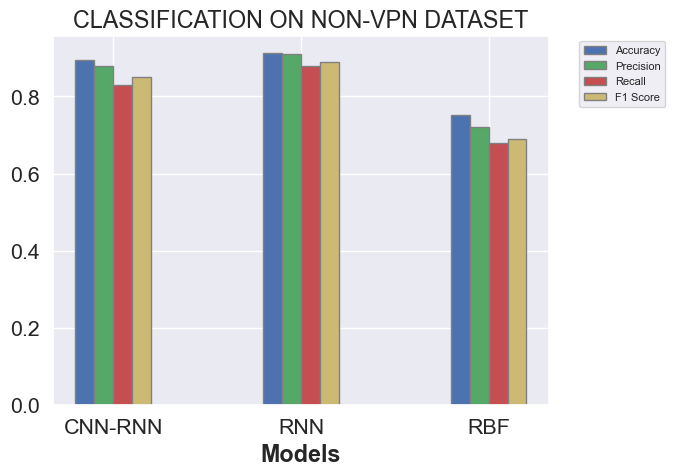

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their metrics
models = ['CNN-RNN', 'RNN', 'RBF']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
accuracy = [0.8937,0.9120,0.7512]
precision = [0.88, 0.91, 0.72]
recall = [0.83, 0.88, 0.68]
f1_score = [0.85, 0.89, 0.69]

# Set the width of the bars
bar_width = 0.1

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar graph
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='y', width=bar_width, edgecolor='grey', label='F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width * 1.5 for r in range(len(models))], models)

#Add a legend with reduced font size and placed outside the graph
plt.legend(prop={'size': 8}, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.title('CLASSIFICATION ON NON-VPN DATASET')
plt.show()
